# Krzywa Beziera

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

In [23]:
def bernstein(vth_of_nth, nth, x):
    coefficient = scipy.special.binom(nth, vth_of_nth)
    return coefficient * x ** vth_of_nth * (1 - x) ** (nth - vth_of_nth)

bernstein(0, 2, 1/2) + bernstein(1, 2, 1/2) + bernstein(2, 2, 1/2)

1.0

In [16]:
def bezier(xs, ctrl_points, weights):
    n = len(ctrl_points) - 1  # indexed from 0
    
    numerator = sum([weights[i] * ctrl_points[i] * bernstein(i, n, xs) for i in range(n+1)])
    denominator = sum([weights[i] * bernstein(i, n, xs) for i in range(n+1)])
    
    return numerator / denominator

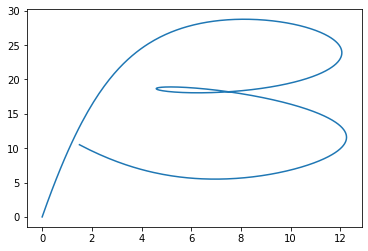

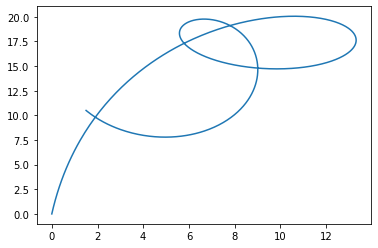

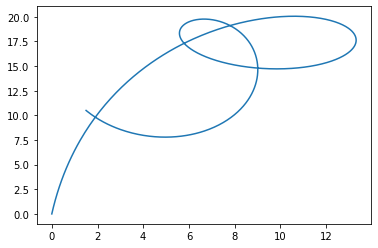

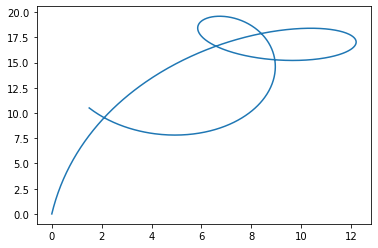

In [46]:
control_points = np.array([
    [0, 0], [3.5, 36], [25, 25], [25, 1.5], [-5, 3], [-5, 33],
    [15, 11], [-0.5, 35], [19.5, 15.5], [7, 0], [1.5, 10.5],
])

weights1 = np.array([1, 6, 4, 2, 3, 4, 2, 1, 5, 4, 1])
weights2 = np.array([1 for _ in range(11)])
weights3 = np.array([5 for _ in range(11)])
weights4 = np.array([1/_ for _ in range(1, 11+1)])

X = np.linspace(0., 1., 1_000)

for weights in [weights1, weights2, weights3, weights4]:
    Y = np.array([bezier(x, control_points, weights) for x in X])
    plt.plot(Y[:, 0], Y[:, 1])
    plt.show()